In [ ]:


savefolder = "/Users/your/savefolder"
datafolder = "/Users/your/datafolder"

In [161]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os

from scipy.optimize import curve_fit

plt.rcParams['font.family'] = 'Arial'

# exp_name = "zebra_stimRest"
# color = "blue"
# data = pd.read_pickle(r"%s/df_zebra_0dph_group_black_stimRest_pulse.pkl" % datafolder)

exp_name = "medaka_stimRest"
color = "orange"
data = pd.read_pickle(r"%s/df_medaka_0dph_group_black_stimRest_pulse.pkl" % datafolder)

data.tail()


,stimulus_index,fish_index,trial_index,start_time_index,center_distance,start_position_x,start_position_y,head_angle,bout_angle,accumulated_angle,fishName
177589,19,29,14,17.211111,7.105528,0.110530,0.042517,-63.288130,79.729316,656.711870,2020_11_17_fish204
177590,19,29,14,18.811111,14.403976,0.239853,-0.010114,20.121030,41.874032,740.121030,2020_11_17_fish204
177591,19,29,14,21.966667,17.519696,0.272846,0.104000,136.059713,38.752475,856.059713,2020_11_17_fish204
177592,19,29,14,23.422222,14.010398,0.205529,0.110829,-139.617266,62.189439,940.382734,2020_11_17_fish204
177593,19,29,14,24.588889,12.451011,0.206293,0.022501,-8.159067,20.280691,1071.840933,2020_11_17_fish204


this is good fish, 0, 14.985016116060565
this is good fish, 1, 14.178583061020635
this is good fish, 2, 19.859793449129484
this is good fish, 3, 21.83128523805683
this is good fish, 4, 21.123323969955766
this is good fish, 5, 15.565551713830368
this is good fish, 6, 22.790588978041114
this is good fish, 7, 26.832989430298785
this is good fish, 9, 20.987949072071693
this is good fish, 10, 25.149527337419396
this is good fish, 11, 19.69035475762923
this is good fish, 12, 19.87198806949686
this is good fish, 14, 20.726120921020232
this is good fish, 16, 24.668290820313725
this is good fish, 18, 24.79522186684449
this is good fish, 21, 23.997693597817495
this is good fish, 22, 19.205422712870234
this is good fish, 23, 27.089600479717003
this is good fish, 26, 21.80381957183357
this is good fish, 27, 17.018771191532135
this is good fish, 28, 20.233019075033052
this is good fish, 29, 17.421062094842117
22 fish are good enough


(array([ 436.,  488.,  614.,  688.,  860., 1021., 1144., 1329., 1419.,
        1658., 1759., 1989., 2232., 2379., 2517., 2770., 3033., 3279.,
        3531., 3979., 4476., 5132., 6195., 7470., 8932., 8806., 7422.,
        6008., 4978., 4435., 3963., 3594., 3293., 3090., 2710., 2414.,
        2241., 2004., 1911., 1695., 1509., 1252., 1132., 1014.,  832.,
         736.,  573.,  457.,  372.,  337.]),
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.,   60.,   64.,   68.,   72.,   76.,
          80.,   84.,   88.,   92.,   96.,  100.]),
 <BarContainer object of 50 artists>)

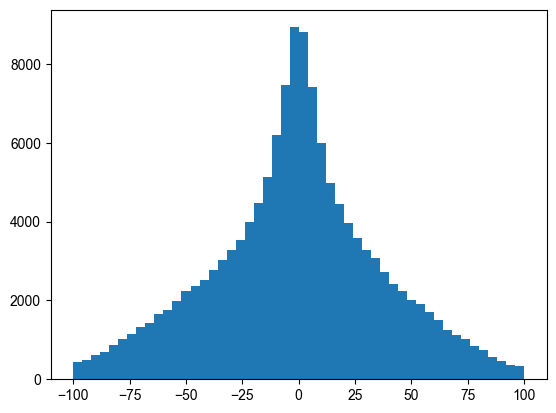

In [162]:
good_fishs = []

for fish_n in range(62): #data.max(axis="fish_index")):
    fish_data = data.loc[(data['fish_index'] == fish_n)]
    if fish_data['center_distance'].mean() < 30:
        good_fishs.append(fish_n)
        print("this is good fish, %s, %s" % (fish_n, fish_data['center_distance'].mean()))

print("%s fish are good enough" % len(good_fishs))
selected_fish_data = data.loc[data['fish_index'].isin(good_fishs)]

plt.hist(selected_fish_data["bout_angle"], range=[-100, 100], bins=50)

In [142]:
stimulus_pattern = []

orientations = [0, 1]
patterns = [0,1,2,3,4,5,6,7,8,9]
rests = [0.25, 2]
pulses = [0.25, 0.5, 1, 2, 5]

trial_num = 15
time_start = 7
time_stop = 25
start_timing = 0
middle_timing = time_start
stop_timing = time_stop
dt = 1./ 90
binning1 = np.arange(start_timing, stop_timing-0.1, 0.05)
analysis_bin = np.arange(start_timing, stop_timing-0.1, 0.2)


0


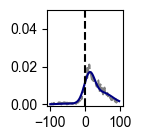

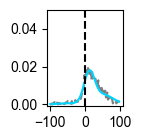

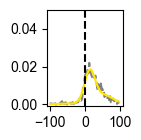

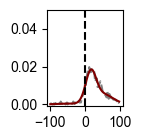

1


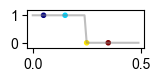

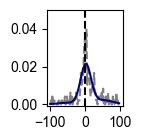

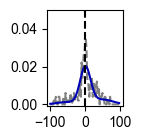

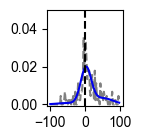

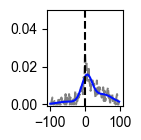

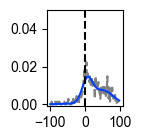

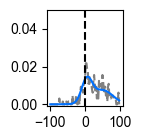

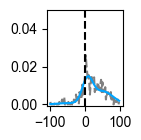

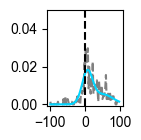

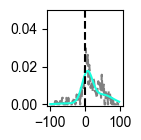

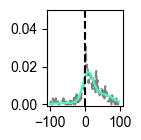

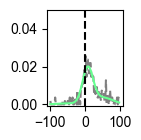

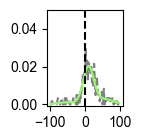

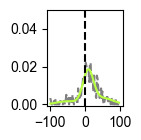

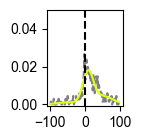

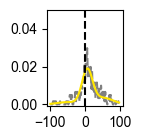

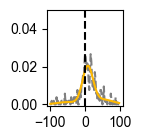

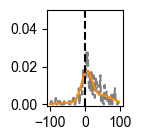

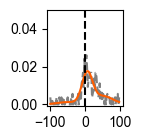

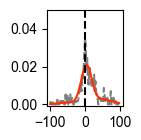

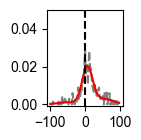

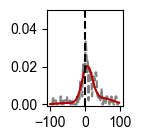

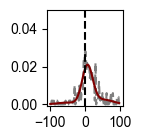

2


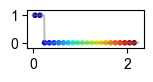

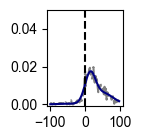

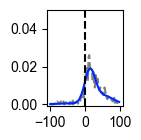

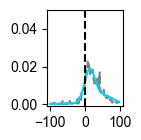

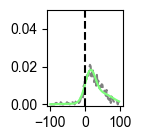

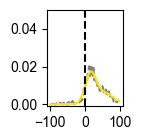

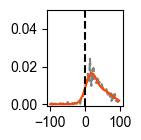

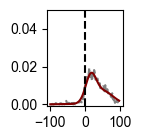

3


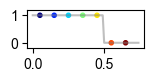

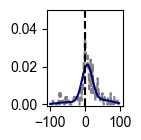

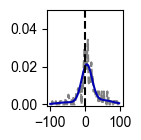

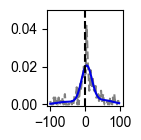

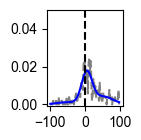

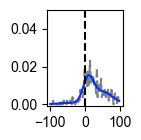

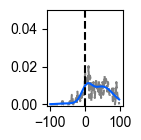

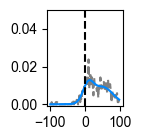

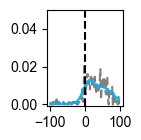

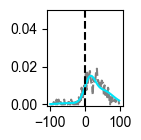

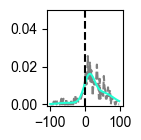

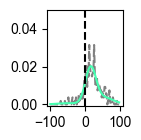

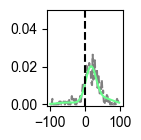

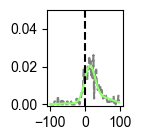

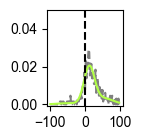

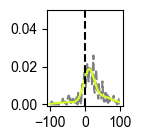

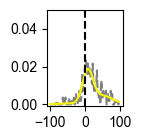

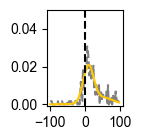

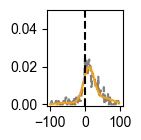

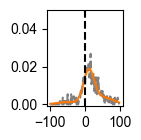

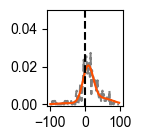

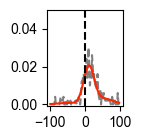

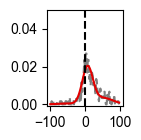

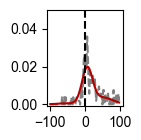

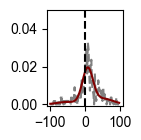

4


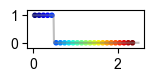

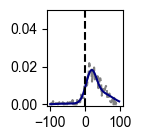

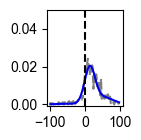

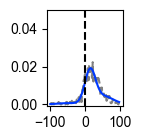

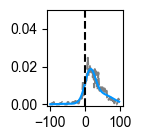

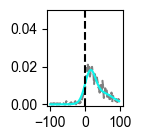

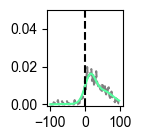

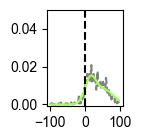

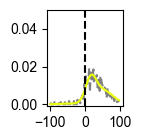

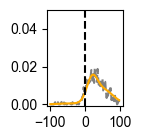

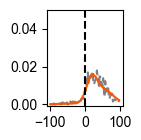

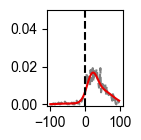

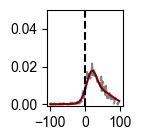

5


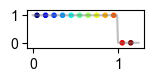

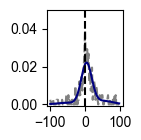

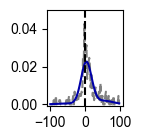

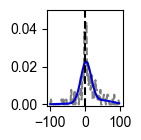

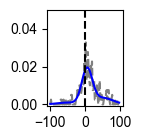

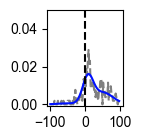

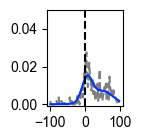

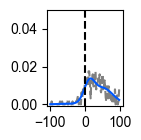

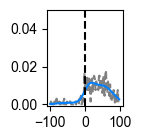

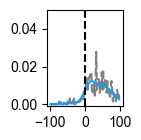

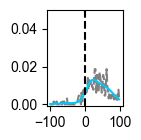

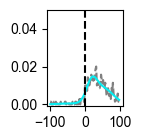

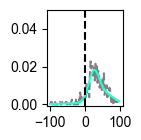

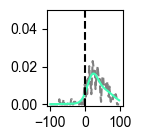

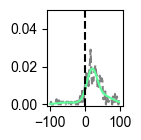

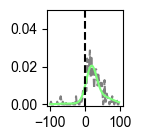

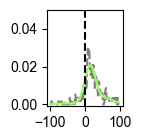

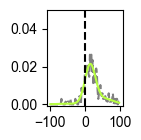

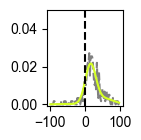

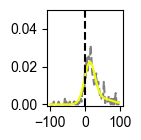

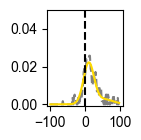

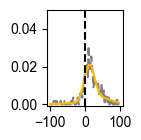

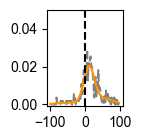

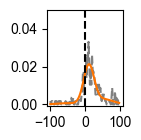

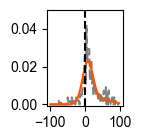

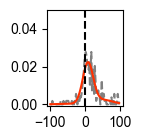

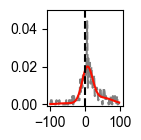

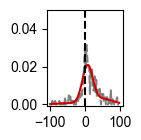

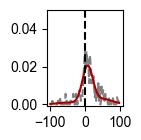

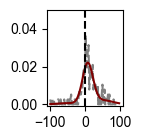

6


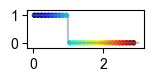

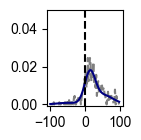

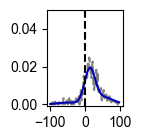

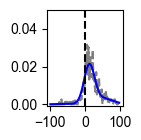

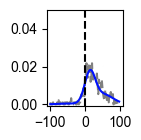

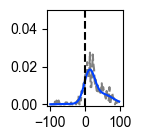

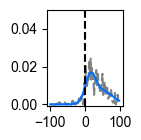

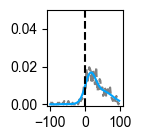

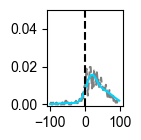

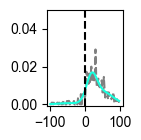

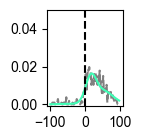

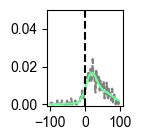

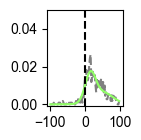

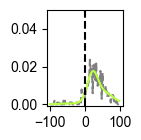

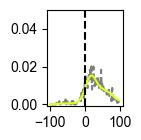

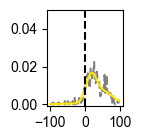

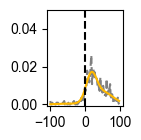

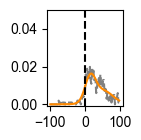

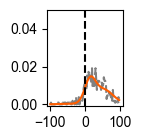

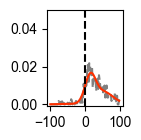

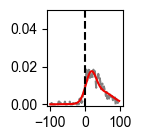

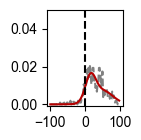

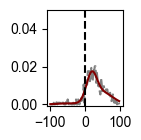

7


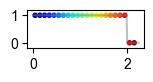

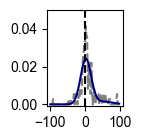

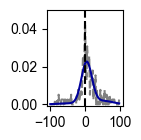

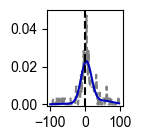

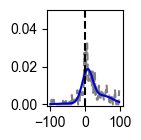

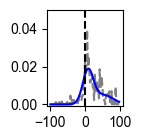

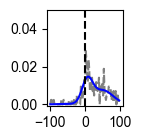

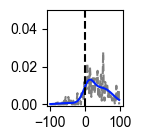

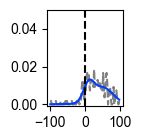

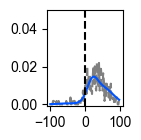

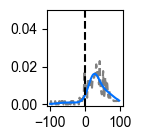

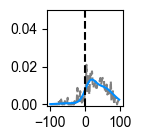

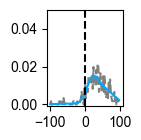

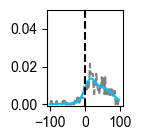

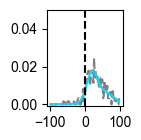

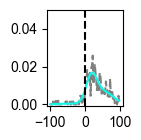

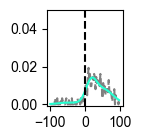

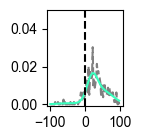

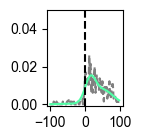

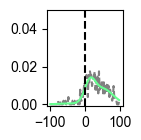

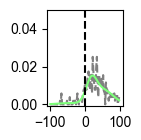

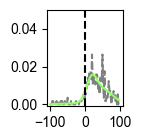

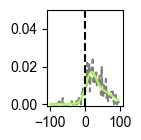

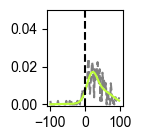

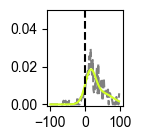

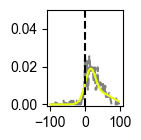

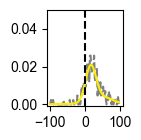

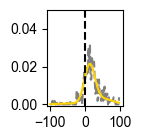

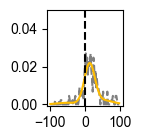

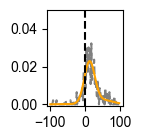

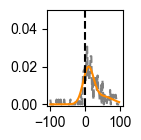

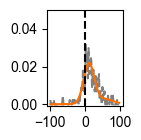

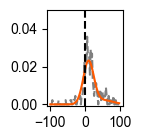

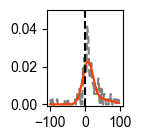

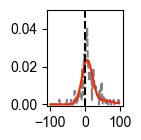

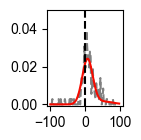

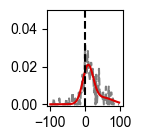

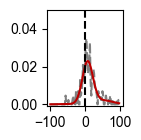

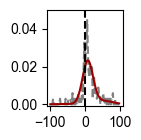

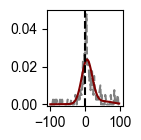

8


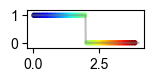

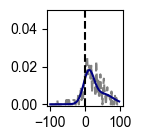

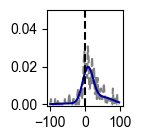

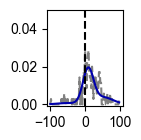

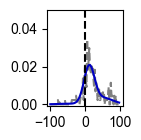

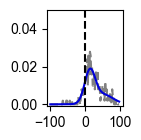

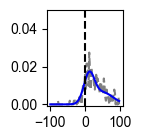

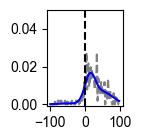

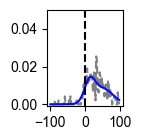

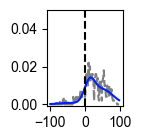

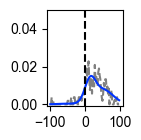

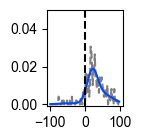

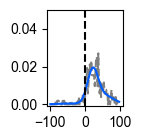

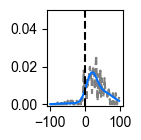

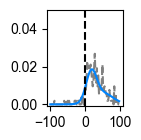

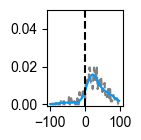

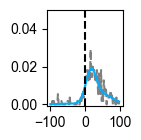

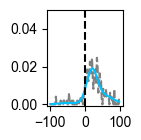

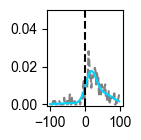

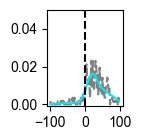

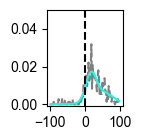

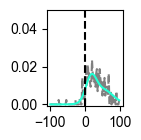

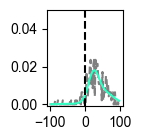

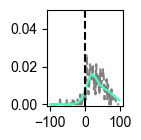

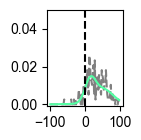

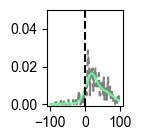

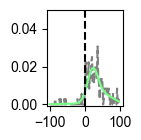

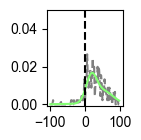

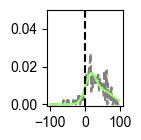

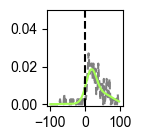

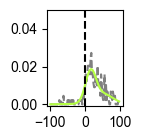

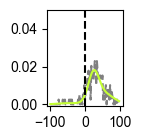

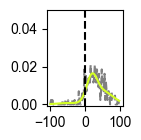

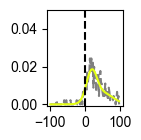

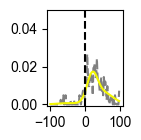

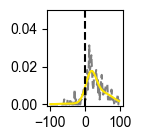

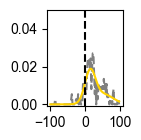

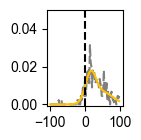

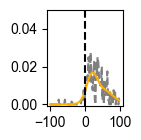

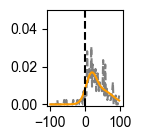

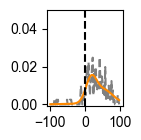

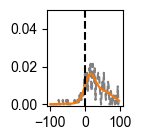

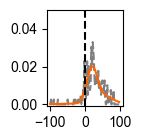

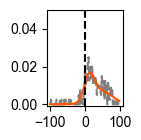

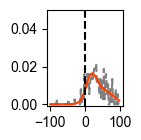

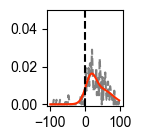

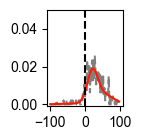

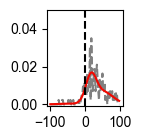

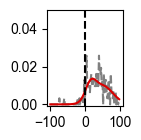

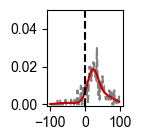

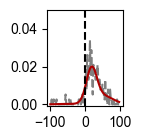

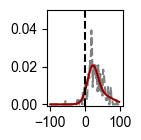

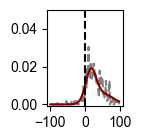

9


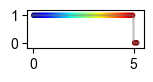

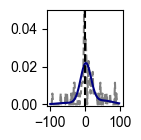

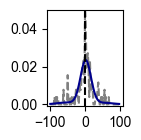

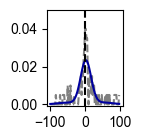

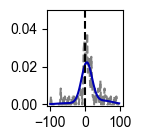

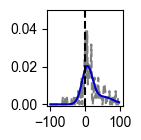

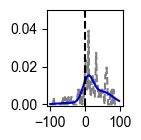

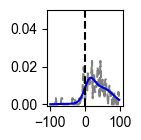

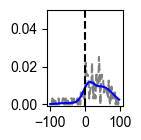

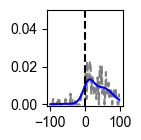

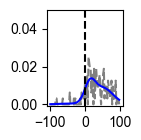

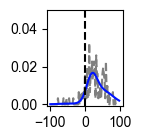

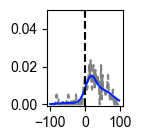

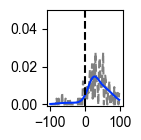

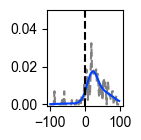

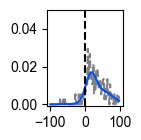

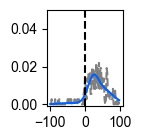

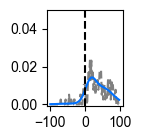

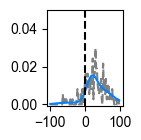

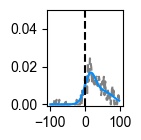

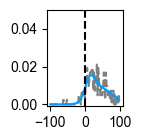

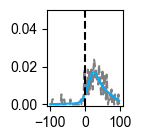

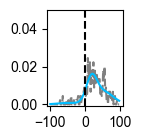

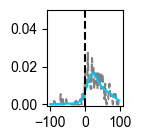

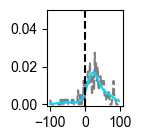

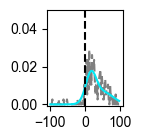

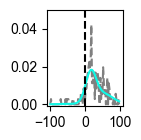

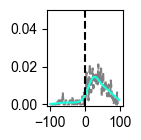

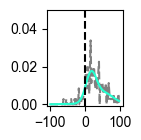

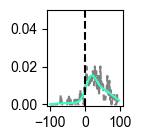

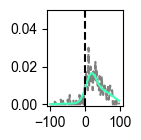

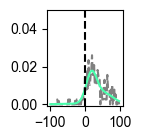

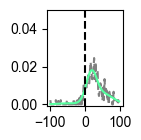

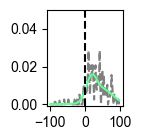

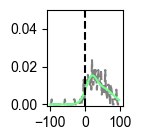

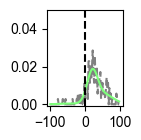

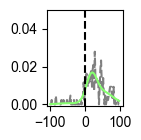

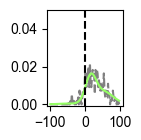

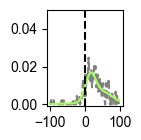

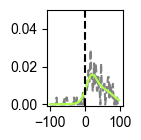

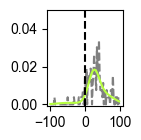

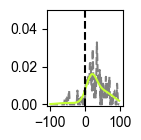

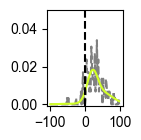

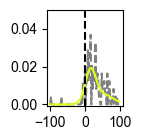

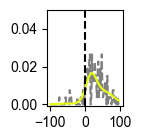

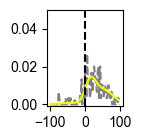

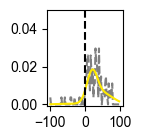

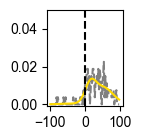

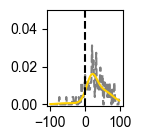

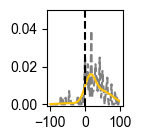

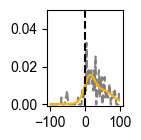

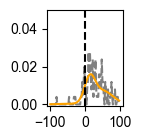

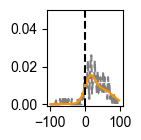

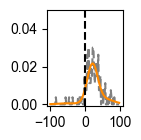

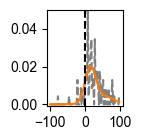

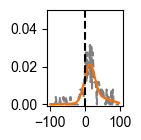

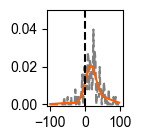

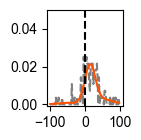

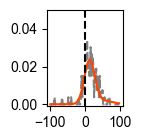

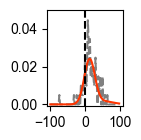

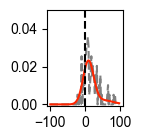

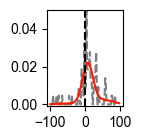

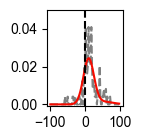

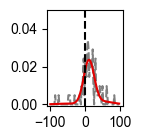

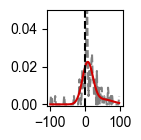

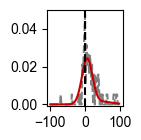

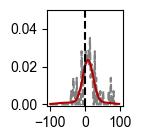

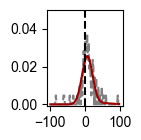

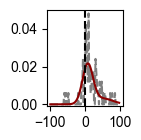

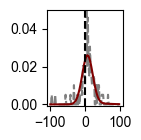

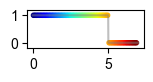

In [19]:

# ## to make fitting for small turns and big turns.
## I'll fit three gaussian curves, small turn and big turns.
## for big turns, we see time constant of the amplitude 
## for small turns, we see time constant of the average

def up_exp_cureve(x, *p):
    tau, onset, A, t0 = p
    return A *(1 - np.exp(-(x - t0)/tau)) + onset
        
def down_exp_cureve(x, *p):
    tau, onset, A, t0 = p
    return A * np.exp(-(x - t0)/tau) + onset

thres_angle = 25

tConstant_rise_Als, tConstant_decay_Als, tConstant_rise_Mfs, tConstant_decay_Mfs  = [],[],[],[]

    
for pattern in patterns:
    print(pattern)
    
    # stimuli
    stimuli = []
    i, j = divmod(pattern, 2)
    pulse = pulses[i]
    rest = rests[j]
#     print(pulse, rest)
    
    stimBinx = np.arange(0, pulse + rest, 0.01)
    unitBinx = np.arange(0, pulse + rest, 0.1)
    colors = plt.cm.jet(np.linspace(0,1,len(unitBinx)-1))
    
    # fish
    stimulus_pattern_n = pattern
    r_stim_data = selected_fish_data.loc[(selected_fish_data['stimulus_index'] == stimulus_pattern_n)]

    stimulus_pattern_n = pattern + len(patterns)
    l_stim_data = selected_fish_data.loc[(selected_fish_data['stimulus_index'] == stimulus_pattern_n)]

    df = r_stim_data.copy()
    df['bout_angle'] = r_stim_data['bout_angle'] * (-1)

    merge_data = [l_stim_data, df]
    big_data = pd.concat(merge_data)
    
    remainder = big_data.loc[(big_data['start_time_index'] > 7)]
    remainder7 = remainder.copy()
    remainder7['start_time_index'] = remainder['start_time_index'] - 7

    big_data["mode"] = remainder7['start_time_index'].mod(pulse + rest)
    
    Mf_fs, Al_fs, show_t_units = [], [], []
    
    for t_bin in range(len(unitBinx) - 1):

        show_t_units.append((unitBinx[t_bin + 1] + unitBinx[t_bin]) / 2)
        data_sub = big_data.loc[(big_data["mode"] > unitBinx[t_bin]) & (
                        big_data["mode"] < unitBinx[t_bin + 1])]
        turning_angles = data_sub["bout_angle"].tolist()
        hist_val, hist_bins = np.histogram(turning_angles, bins=np.arange(-100,102,2), density=True)

        sum_val = sum(hist_val)
        
        def calculate_everything(x_axis, Mf, Al, Ar):
            """##zebrafish
            Mr, Ml = -50, 50
            Sr, Sl = 20, 20#15, 15
            Sf = 5

            """##medaka
            Mr, Ml = -50, 50
            Sr, Sl = 30, 30
            Sf = 15
            
            Af = 1 - Ar - Al

            left_turn = np.exp(-(x_axis-Ml)**2/(2.*Sl**2)) #norm.pdf(x_axis, Ml, Sl)
            left_turn = left_turn/np.sum(left_turn)
            right_turn =  np.exp(-(x_axis-Mr)**2/(2.*Sr**2)) #norm.pdf(x_axis, Mr, Sr)
            right_turn = right_turn/np.sum(right_turn)
            forward_swim = np.exp(-(x_axis-Mf)**2/(2.*Sf**2)) #norm.pdf(x_axis, Mf, Sf)
            forward_swim = forward_swim/np.sum(forward_swim)
            return (Al * left_turn + Ar * right_turn + Af * forward_swim)*sum_val/(Al + Ar + Af)
        
        initial_guesses = (0, 0.5, 0.1)
        
        popt, pcov = curve_fit(calculate_everything, np.arange(-100,100,2), hist_val, p0=initial_guesses, maxfev=5000, bounds = ((-5,0.0,0.0),(30,0.7,0.3)))
        Mf_f, Al_f, Ar_f = popt
        Mf_fs.append(Mf_f)
        Al_fs.append(Al_f)
        new_distribution = calculate_everything(Mf=Mf_f, Al=Al_f, Ar=Ar_f, x_axis=np.arange(-100,100,2))
        
        # visualize the turn angle distribution with fitting gaussian distributions
        
        fig, axs = plt.subplots(1, figsize=(1.5,1.5))
        plt.plot(np.arange(-100,100,2), hist_val, color="gray", linestyle="--")
        plt.plot(np.arange(-100,100,2), new_distribution, color=colors[t_bin])
        plt.ylim(-0.001, 0.05)
        plt.axvline(0, color="black", linestyle="--")
        plt.tight_layout()
        plt.savefig("%s/uniDirection/fit_three_gaussian/fig_%s_pattern%s_unit_distributions_time%s_newColor.svg" % (datafolder, exp_name, pattern, t_bin),
                            transparent=True)
        plt.show()

    ## visualize one cycle of the stimuli with rainbow color bar
    
    fig, axs = plt.subplots(1, figsize=(1.5,0.5))
    show_t_units_ys, stimBiny = [], []
    for t in (show_t_units):
        if t < pulse:
            show_t_units_ys.append(1)
        else:
            show_t_units_ys.append(0)
    for t in (stimBinx):
        if t < pulse:
            stimBiny.append(1)
        else:
            stimBiny.append(0)
            
    plt.plot(stimBinx, stimBiny, color="grey",alpha=0.5)
    plt.scatter(show_t_units, show_t_units_ys,  marker="o", c=colors, s=9)
    plt.ylim(-0.2,1.2)
    plt.savefig("%s/uniDirection/fit_three_gaussian/fig_%s_pattern%s_stimuli_newColor.svg" % (datafolder, exp_name, pattern),
                            transparent=True)



/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/3352129938.py:164: RuntimeWarning: Mean of empty slice
  allfish_turning_angles.append(np.nanmean(turning_angles))
/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/3352129938.py:164: RuntimeWarning: Mean of empty slice
  allfish_turning_angles.append(np.nanmean(turning_angles))
/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/3352129938.py:164: RuntimeWarning: Mean of empty slice
  allfish_turning_angles.append(np.nanmean(turning_angles))
/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/3352129938.py:164: RuntimeWarning: Mean of empty slice
  allfish_turning_angles.append(np.nanmean(turning_angles))
/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/3352129938.py:164: RuntimeWarning: Mean of empty slice
  allfish_turning_angles.append(np.nanmean(turning_angles))
/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/3352129938.py:164: RuntimeWarning: 

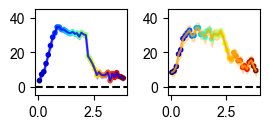

In [112]:
## to visualize the dynamics of average turn angle during the experiment with unidirectional stimuli

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## here I specify for the stimuli with 2 sec pulse and 2 sec rest period
patterns_good = [ 7]

def up_exp_cureve(x, *p):
    tau, onset, A, t0 = p
    return A *(1 - np.exp(-(x - t0)/tau)) + onset
        
def down_exp_cureve(x, *p):
    tau, onset, A, t0 = p
    return A * np.exp(-(x - t0)/tau) + onset

tConstant_rise_Als, tConstant_decay_Als, tConstant_rise_Mfs, tConstant_decay_Mfs  = [],[],[],[]

unitBin_show_show = np.arange(0.05, 4, 0.1)
unitBin_show = np.arange(0.05, 2-0.1, 0.1)

exp_names = ["zebra_stimRest", "medaka_stimRest"]
species = ["zebrafish", "medaka"]
fish_colors = ["blue", "orange"]
datas = [pd.read_pickle(r"%s/df_zebra_0dph_group_black_stimRest_pulse.pkl" % datafolder),
         pd.read_pickle(r"%s/df_medaka_0dph_group_black_stimRest_pulse.pkl" % datafolder)]

df_stats = pd.DataFrame(columns=["fish_id", "species", "big_rise_tau", "big_decay_tau","small_rise_tau", "small_decay_tau"])
df_traces = []

f, (ax0) = plt.subplots(1, 2, figsize=(2.8, 1.4))

for exp_name_i, exp_name in enumerate(exp_names):
    color = fish_colors[exp_name_i]
    data = datas[exp_name_i]
    
    good_fishs = []
    
    for fish_i in range(62):
        if (exp_name_i == 0) & (fish_i == 31):
            pass
        elif (exp_name_i == 0) & (fish_i == 38):
            pass
        else:
        
            fish_data = data.loc[(data['fish_index'] == fish_i)]

            if fish_data['center_distance'].mean() < 30:
                good_fishs.append(fish_i)
            
    selected_fish_data = data.loc[data['fish_index'].isin(good_fishs)]
    
    tau_Al_l_rises, tau_Al_l_decays, tau_Mf_f_rises, tau_Mf_f_decays = [], [], [], []
    unitBinx = np.arange(0, pulse + rest, 0.1)
    
#     for fish_n, fish_i in enumerate(good_fishs):
# #         print("fish ", fish_n, fish_i)
#         selected_EACH_fish_data = selected_fish_data.loc[(selected_fish_data["fish_index"]==fish_i)]
        
#         big_fish_data = pd.DataFrame(columns=["mode_rise","mode_decay", 'bout_angle'])
        
#         for pattern in patterns_good:

#             # stimuli
#             stimuli = []
#             i, j = divmod(pattern, 2)
#             pulse = pulses[i]
#             rest = rests[j]
#         #     print(pulse, rest)

#             stimBinx = np.arange(0, pulse + rest, 0.01)
#             unitBinx = np.arange(0, pulse + rest, 0.1)

#             # fish
#             stimulus_pattern_n = pattern
#             r_stim_data = selected_EACH_fish_data.loc[(selected_EACH_fish_data['stimulus_index'] == stimulus_pattern_n)]

#             stimulus_pattern_n = pattern + len(patterns)
#             l_stim_data = selected_EACH_fish_data.loc[(selected_EACH_fish_data['stimulus_index'] == stimulus_pattern_n)]

#             df = r_stim_data.copy()
#             df['bout_angle'] = r_stim_data['bout_angle'] * (-1)

#             merge_data = [l_stim_data, df]
#             big_data = pd.concat(merge_data)

#             remainder = big_data.loc[(big_data['start_time_index'] > 7)]
#             remainder7 = remainder.copy()
#             remainder7['start_time_index'] = remainder['start_time_index'] - 7

#             big_data["mode_rise"] = remainder7['start_time_index'].mod(pulse + rest)
#             big_data["mode_decay"] = remainder7['start_time_index'].mod(pulse + rest) - pulse
            
#             big_fish_data = pd.concat([big_fish_data, big_data])
            
        
#             unitBinx = np.arange(0, pulse + rest, 0.1)
#             colors = plt.cm.jet(np.linspace(0,1,len(unitBinx)-1))
            
#             show_t_units, fish_turning_angles = [], []
#             for t_bin in range(len(unitBinx) - 1):
#                 show_t_units.append((unitBinx[t_bin + 1] + unitBinx[t_bin]) / 2)
#                 data_sub = big_data.loc[(big_data["mode_rise"] > unitBinx[t_bin]) & (
#                                 big_data["mode_rise"] < unitBinx[t_bin + 1])]
#                 turning_angles = data_sub["bout_angle"].tolist()
#                 fish_turning_angles.append(np.nanmean(turning_angles))
                
#             ax0[exp_name_i].plot(show_t_units, fish_turning_angles, color=fish_colors[exp_name_i], alpha=0.05)
            
    show_t_units, time_ave, time_ste = [], [], []
    
    for t_bin in range(len(unitBinx) - 1):
        show_t_units.append((unitBinx[t_bin + 1] + unitBinx[t_bin]) / 2)
        allfish_turning_angles = []
        
        for fish_n, fish_i in enumerate(good_fishs):
            selected_EACH_fish_data = selected_fish_data.loc[(selected_fish_data["fish_index"]==fish_i)]
            for pattern in patterns_good:

                # stimuli
                stimuli = []
                i, j = divmod(pattern, 2)
                pulse = pulses[i]
                rest = rests[j]

                stimBinx = np.arange(0, pulse + rest, 0.01)
                unitBinx = np.arange(0, pulse + rest, 0.1)

                # fish
                stimulus_pattern_n = pattern
                r_stim_data = selected_EACH_fish_data.loc[(selected_EACH_fish_data['stimulus_index'] == stimulus_pattern_n)]

                stimulus_pattern_n = pattern + len(patterns)
                l_stim_data = selected_EACH_fish_data.loc[(selected_EACH_fish_data['stimulus_index'] == stimulus_pattern_n)]

                df = r_stim_data.copy()
                df['bout_angle'] = r_stim_data['bout_angle'] * (-1)

                merge_data = [l_stim_data, df]
                big_data = pd.concat(merge_data)

                remainder = big_data.loc[(big_data['start_time_index'] > 7)]
                remainder7 = remainder.copy()
                remainder7['start_time_index'] = remainder['start_time_index'] - 7

                big_data["mode_rise"] = remainder7['start_time_index'].mod(pulse + rest)
                
                data_sub = big_data.loc[(big_data["mode_rise"] > unitBinx[t_bin]) & (
                                big_data["mode_rise"] < unitBinx[t_bin + 1])]
                turning_angles = data_sub["bout_angle"].tolist()
                allfish_turning_angles.append(np.nanmean(turning_angles))
        time_ave.append(np.nanmean(allfish_turning_angles))
        time_ste.append(np.nanstd(allfish_turning_angles)/np.sqrt(len(good_fishs)))

    colors = plt.cm.jet(np.linspace(0,1,len(unitBinx)-1))
    ax0[exp_name_i].fill_between(show_t_units, np.array(time_ave)-np.array(time_ste), np.array(time_ave)+np.array(time_ste), color=fish_colors[exp_name_i],alpha=0.3)
    ax0[exp_name_i].plot(show_t_units, time_ave, color=fish_colors[exp_name_i], alpha=0.8)
    ax0[exp_name_i].scatter(show_t_units, time_ave, c=colors, marker="o",s=9)
    ax0[exp_name_i].axhline(0, color="black", linestyle="--")
    ax0[exp_name_i].set_ylim(-5, 45)
    
    
plt.tight_layout()
# plt.savefig("%s/uniDirection/fit_three_gaussian/fig_uni_pattern7_stimuli_newColor.svg" % (datafolder),
#                             transparent=True)
plt.show()

fish  0
fish  1
fish  2
fish  3


/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/2802063987.py:162: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df3 = pd.concat([df3, pd.DataFrame(df)], ignore_index=True)
/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/2802063987.py:192: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_stats = pd.concat([df_stats, pd.DataFrame(df5)], ignore_index=True)
/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/2802063987.py:206: FutureWarning: The behavi

fish  4
fish  5
fish  6
fish  7
fish  8
fish  9
fish  10
fish  11
fish  12
fish  13
fish  14
fish  15


/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/2802063987.py:118: RuntimeWarning: Mean of empty slice
  ave_turn_angles.append(np.nanmean(turning_angles))


fish  16
fish  17
fish  18
fish  19
fish  20
fish  21
fish  22
fish  23
fish  24
fish  25
fish  26
fish  27


/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/2802063987.py:118: RuntimeWarning: Mean of empty slice
  ave_turn_angles.append(np.nanmean(turning_angles))


fish  28
fish  29
fish  30
fish  31
fish  32
fish  33
fish  34
fish  35


/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/2802063987.py:118: RuntimeWarning: Mean of empty slice
  ave_turn_angles.append(np.nanmean(turning_angles))


fish  36
fish  37
fish  38
fish  39


/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/2802063987.py:118: RuntimeWarning: Mean of empty slice
  ave_turn_angles.append(np.nanmean(turning_angles))
/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/2802063987.py:118: RuntimeWarning: Mean of empty slice
  ave_turn_angles.append(np.nanmean(turning_angles))
/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/2802063987.py:118: RuntimeWarning: Mean of empty slice
  ave_turn_angles.append(np.nanmean(turning_angles))


fish  40
fish  41
fish  42
fish  43
fish  44
fish  45
fish  46
fish  47


/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/2802063987.py:118: RuntimeWarning: Mean of empty slice
  ave_turn_angles.append(np.nanmean(turning_angles))


fish  48
fish  49
fish  50
fish  51
fish  52
fish  0
fish  1
fish  2
fish  3
fish  4


/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/2802063987.py:162: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df3 = pd.concat([df3, pd.DataFrame(df)], ignore_index=True)
/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/2802063987.py:206: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df4 = pd.concat([df4, pd.DataFrame(df2)], ignore_index=True)


fish  5
fish  6
fish  7
fish  8
fish  9
fish  10
fish  11
fish  12
fish  13
fish  14
fish  15
fish  16
fish  17
fish  18


/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/2802063987.py:118: RuntimeWarning: Mean of empty slice
  ave_turn_angles.append(np.nanmean(turning_angles))
/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/2802063987.py:118: RuntimeWarning: Mean of empty slice
  ave_turn_angles.append(np.nanmean(turning_angles))
/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/2802063987.py:118: RuntimeWarning: Mean of empty slice
  ave_turn_angles.append(np.nanmean(turning_angles))


fish  19
fish  20
fish  21


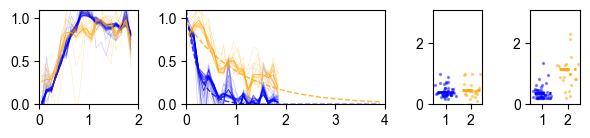

,fish_id,species,rise_tau,decay_tau
0,0,zebrafish,0.261551,0.200000
1,1,zebrafish,0.405510,0.475997
2,2,zebrafish,0.321361,0.200000
3,3,zebrafish,0.661286,0.200000
4,4,zebrafish,0.369090,0.200000
...,...,...,...,...
70,23,medaka,0.535656,0.816011
71,26,medaka,0.429788,0.995837
72,27,medaka,0.161375,1.537800
73,28,medaka,0.324100,0.399513


In [110]:
## make the time constant graph, plot the change of normalized turn angles
## show each fish

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def up_exp_cureve(x, *p):
    tau, onset, A, t0 = p
    return A *(1 - np.exp(-(x - t0)/tau)) + onset
        
def down_exp_cureve(x, *p):
    tau, onset, A, t0 = p
    return A * np.exp(-(x - t0)/tau) + onset

tConstant_rise_Als, tConstant_decay_Als, tConstant_rise_Mfs, tConstant_decay_Mfs  = [],[],[],[]

f, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, width_ratios=[1, 2, 0.5, 0.5], figsize=(6, 1.5))

unitBin_show_show = np.arange(0.05, 4, 0.1)
unitBin_show = np.arange(0.05, 2-0.1, 0.1)

exp_names = ["zebra_stimRest", "medaka_stimRest"]
species = ["zebrafish", "medaka"]
colors = ["blue", "orange"]
datas = [pd.read_pickle(r"%s/df_zebra_0dph_group_black_stimRest_pulse.pkl" % datafolder),
         pd.read_pickle(r"%s/df_medaka_0dph_group_black_stimRest_pulse.pkl" % datafolder)]

tau_rises_ave, tau_decays_ave = [], []

df_stats = pd.DataFrame(columns=["fish_id", "species", "rise_tau", "decay_tau"])

for exp_name_i, exp_name in enumerate(exp_names):
    color = colors[exp_name_i]
    data = datas[exp_name_i]
    
    good_fishs = []

    for fish_n in range(62): #data.max(axis="fish_index")):
        fish_data = data.loc[(data['fish_index'] == fish_n)]
        if fish_data['center_distance'].mean() < 30:
            good_fishs.append(fish_n)
            
    selected_fish_data = data.loc[data['fish_index'].isin(good_fishs)]
    
    df3 = pd.DataFrame(columns=["fish_i", "time_bin", "ave_signal", "which", "pattern"])
    df4 = pd.DataFrame(columns=["fish_i","time_bin", "signal_up","signal_down"])
    
    tau_rises, tau_decays = [], []
    
    for fish_n, fish_i in enumerate(good_fishs):
        print("fish ", fish_n)
        selected_EACH_fish_data = selected_fish_data.loc[(selected_fish_data["fish_index"]==fish_i)]
        tau_rise_fish, tau_decay_fish = [], []

        for pattern in patterns_good:

            # stimuli
            stimuli = []
            i, j = divmod(pattern, 2)
            pulse = pulses[i]
            rest = rests[j]

            stimBinx = np.arange(0, pulse + rest, 0.01)
            unitBinx = np.arange(0, pulse + rest, 0.1)

            # fish
            stimulus_pattern_n = pattern
            r_stim_data = selected_EACH_fish_data.loc[(selected_EACH_fish_data['stimulus_index'] == stimulus_pattern_n)]

            stimulus_pattern_n = pattern + len(patterns)
            l_stim_data = selected_EACH_fish_data.loc[(selected_EACH_fish_data['stimulus_index'] == stimulus_pattern_n)]

            df = r_stim_data.copy()
            df['bout_angle'] = r_stim_data['bout_angle'] * (-1)

            merge_data = [l_stim_data, df]
            big_data = pd.concat(merge_data)

            remainder = big_data.loc[(big_data['start_time_index'] > 7)]
            remainder7 = remainder.copy()
            remainder7['start_time_index'] = remainder['start_time_index'] - 7

            big_data["mode"] = remainder7['start_time_index'].mod(pulse + rest)

            ave_turn_angles, show_t_units = [], []

            for t_bin in range(len(unitBinx) - 1):

                show_t_units.append((unitBinx[t_bin + 1] + unitBinx[t_bin]) / 2)
                data_sub = big_data.loc[(big_data["mode"] > unitBinx[t_bin]) & (
                                big_data["mode"] < unitBinx[t_bin + 1])]
                turning_angles = data_sub["bout_angle"].tolist()
                ave_turn_angles.append(np.nanmean(turning_angles))

            ## do the fitting 
            unitBin_up = np.arange(0.05, pulse+0.1, 0.1)
            unitBin_uppp = np.arange(0.05, pulse, 0.1)
            unitBin_down = np.arange(pulse+0.05, pulse+rest, 0.1)
            unitBin_down_show = np.arange(0.05, rest, 0.1)

            up_data = np.array(ave_turn_angles[0:len(unitBin_up)])
            down_data = np.array(ave_turn_angles[len(unitBin_uppp):])
            
            if len(unitBin_down) > len(down_data):
                unitBin_down = unitBin_down[:-1]
                unitBin_down_show = unitBin_down_show[:-1]

            valid_mask = ~np.isnan(up_data)
            # Apply mask to both arrays
            cleaned_up_data = up_data[valid_mask]
            cleaned_unitBin_up = unitBin_up[valid_mask]

            valid_mask2 = ~np.isnan(down_data)
            # Apply mask to both arrays
            cleaned_down_data = down_data[valid_mask2]
            cleaned_unitBin_down = unitBin_down[valid_mask2]
            cleaned_unitBin_down_show = unitBin_down_show[valid_mask2]

            p0 = [0.2, 5, 30, 0.05]
        #     tau, onset, A, t0 = p
            coeff_u, var_matrix = curve_fit(up_exp_cureve, cleaned_unitBin_up, cleaned_up_data, p0=p0, maxfev=5000, 
                                            bounds = ((0,0,25,0),(1,10,35,0.1)))
            tauu, onsetu, Au, t0u = coeff_u
            tau_rise_fish.append(tauu)
    #         norm_fitu = []
            for j in range(len(cleaned_unitBin_up)):
    #             norm_fitu.append(up_data[j]/Au)
                if up_data[j] == np.nan:
                    pass
                else:
                    df = pd.DataFrame({"fish_i":fish_i,
                                       "time_bin":cleaned_unitBin_up[j], 
                                       "ave_signal":(cleaned_up_data[j]-onsetu)/Au, 
                                       "which":"rise",
                                      "pattern":pattern
                                      },index=[0])
                    df3 = pd.concat([df3, pd.DataFrame(df)], ignore_index=True)

            ## decaying
            p0 = [1.0, 5, 30, pulse]
            coeff_d, var_matrix = curve_fit(down_exp_cureve, cleaned_unitBin_down, cleaned_down_data, p0=p0, maxfev=5000, 
                                            bounds = ((0.2,0,25,pulse-0.1),(5,10,35,pulse+0.2)))
            taud, onsetd, Ad, t0d = coeff_d
            tau_decay_fish.append(taud)

            for j in range(len(cleaned_unitBin_down_show)):
                if down_data[j] == np.nan:
                    pass
                else:

        #             norm_fitd.append(down_data[j]/Ad)
                    df = pd.DataFrame({"fish_i":fish_i,
                                       "time_bin":cleaned_unitBin_down_show[j], 
                                       "ave_signal":(cleaned_down_data[j]-onsetd)/Ad, 
                                       "which":"decay",
                                      "pattern":pattern
                                      },index=[0])
                    df3 = pd.concat([df3, pd.DataFrame(df)], ignore_index=True)

        tau_rises.append(np.nanmean(tau_rise_fish))
        tau_decays.append(np.nanmean(tau_decay_fish))
        
        df5= pd.DataFrame({"fish_id":fish_i, "species":species[exp_name_i],
                           "rise_tau":np.nanmean(tau_rise_fish),
                           "decay_tau":np.nanmean(tau_decay_fish)},
                         index=[0])
        df_stats = pd.concat([df_stats, pd.DataFrame(df5)], ignore_index=True)

        fish_rise, fish_decay = [], []
        for j in range(len(unitBin_show)):
            sub_data_r = df3.loc[(df3["time_bin"]==unitBin_show[j]) & (df3["which"]=="rise")]
            sub_data_d = df3.loc[(df3["time_bin"]==unitBin_show[j]) & (df3["which"]=="decay")]
            fish_rise.append(np.nanmean(sub_data_r["ave_signal"]))
            fish_decay.append(np.nanmean(sub_data_d["ave_signal"]))

            df2 = pd.DataFrame({"fish_i":fish_i,
                                   "time_bin":unitBin_show[j], 
                                   "signal_up":np.nanmean(sub_data_r["ave_signal"]), 
                                   "signal_down":np.nanmean(sub_data_d["ave_signal"]),
                                  },index=[0])
            df4 = pd.concat([df4, pd.DataFrame(df2)], ignore_index=True)
        
        ax0.plot(unitBin_show, fish_rise, color=color, alpha=0.2, linewidth=0.5)#, linestyle="--", color="gray")
        ax1.plot(unitBin_show, fish_decay, color=color, alpha=0.2, linewidth=0.5)
        
        

    ave_ups, ave_downs = [], []
    for j in range(len(unitBin_show)):
        sub = df4.loc[(df4["time_bin"]==unitBin_show[j])]
        ave_ups.append(np.nanmean(sub["signal_up"]))
        ave_downs.append(np.nanmean(sub["signal_down"]))

    ax0.plot(unitBin_show, ave_ups, color=color, alpha=1, linewidth=0.5)#, linestyle="--", color="gray")
    ax1.plot(unitBin_show, ave_downs, color=color, alpha=1, linewidth=0.5)
    
    p0 = [1.0, 0.03, 1, 0]

    coeff_d, var_matrix = curve_fit(down_exp_cureve, unitBin_show, ave_downs, p0=p0, maxfev=5000, 
                                            bounds = ((0.2,0,0.1,0.0),(5,0.05,1.1,0.02)))
    tau, onset, A, t0 = coeff_d
    def down_exp_cureve_show(x, tau, onset, A, t0):
        tau, onset, A, t0 = tau, onset, A, t0
        return A * np.exp(-(x - t0)/tau) 
    
#     out_fit = down_exp_cureve_show(unitBin_show_down_fit, [np.average(tau_decays), 0, 1, 0.1])
    unitBin_show_down_fit = np.arange(0.0, 4, 0.1)
    out_fit = down_exp_cureve_show(unitBin_show_down_fit, tau, onset, A, t0)
    ax1.plot(unitBin_show_down_fit, out_fit, color=color, alpha=0.8, linestyle="--", linewidth=1)

    ax0.set_ylim(0, 1.1)
    ax1.set_ylim(0, 1.1)
    ax0.set_xlim(0,  2)
    ax1.set_xlim(0, 4)

    x1 = np.random.normal(exp_name_i+1, 0.2, size=len(good_fishs))
    x2 = np.random.normal(exp_name_i+1, 0.2, size=len(good_fishs))
    
    # Create scatter plots
    ax2.scatter(x1, tau_rises, alpha=0.4, color=color, s=2)#, alpha=0.5)
    ax3.scatter(x2, tau_decays, alpha=0.4, color=color, s=2)#, alpha=0.5)
    
    # Add mean lines
    ax2.hlines(np.average(tau_rises), exp_name_i+1-0.35, exp_name_i+1+0.35, colors=color, linestyle="--", linewidth=2)
    ax3.hlines(np.average(tau_decays), exp_name_i+1-0.35, exp_name_i+1+0.35,  colors=color, linestyle="--", linewidth=2)
    ax2.set_ylim(0, 3.1)
    ax3.set_ylim(0, 3.1)  
    
    
plt.tight_layout()
# plt.savefig("%s/fig_tau_ave_angles_norm_all.svg" % (datafolder),
#                         transparent=True)
plt.show()
    

df_stats

fish  0
Amp up big turn 0.40845714224764007 Amp down big turn 0.3845239723207387 Amp up small turn 7.480931962419959 Amp down small turn 6.995275675594459
fish  1


/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/3751692179.py:277: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df3 = pd.concat([df3, pd.DataFrame(df)], ignore_index=True)
/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/3751692179.py:310: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_stats = pd.concat([df_stats, pd.DataFrame(df5)], ignore_index=True)
/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/3751692179.py:328: FutureWarning: The behavi

Amp up big turn 0.4213319535355711 Amp down big turn 0.4947607951561371 Amp up small turn 6.105414054605271 Amp down small turn 5.653102949146172
fish  2
Amp up big turn 0.39757089070739915 Amp down big turn 0.463161080909956 Amp up small turn 7.221222268284322 Amp down small turn 3.910270588321201
fish  3
Amp up big turn 0.4784984854114886 Amp down big turn 0.454420169732545 Amp up small turn 6.785498574212443 Amp down small turn 6.123694930296906
fish  4
Amp up big turn 0.43082890691306736 Amp down big turn 0.536214686909725 Amp up small turn 22.392107201268335 Amp down small turn 9.68387232374556
fish  5
Amp up big turn 0.5620427170230636 Amp down big turn 0.6020372713460679 Amp up small turn 7.929983708928779 Amp down small turn 9.961893510816914
fish  6
Amp up big turn 0.37293875961881434 Amp down big turn 0.38701120502544134 Amp up small turn 19.417901262281205 Amp down small turn 12.902822797693817
fish  7
Amp up big turn 0.40086897113284475 Amp down big turn 0.1965592723585235 

/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/3751692179.py:277: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df3 = pd.concat([df3, pd.DataFrame(df)], ignore_index=True)
/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_25712/3751692179.py:328: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df4 = pd.concat([df4, pd.DataFrame(df2)], ignore_index=True)


Amp up big turn 0.5065148683726682 Amp down big turn 0.5459588790837436 Amp up small turn 20.782377649201678 Amp down small turn 20.01159052046543
fish  2
Amp up big turn 0.4282302680217194 Amp down big turn 0.5051272160068022 Amp up small turn 24.999999999999808 Amp down small turn 19.085863606381253
fish  3
Amp up big turn 0.359031145890636 Amp down big turn 0.28909785057186804 Amp up small turn 11.318713245713537 Amp down small turn 15.594787664265624
fish  4
Amp up big turn 0.19188357164060565 Amp down big turn 0.15740798761145455 Amp up small turn 12.593076906173868 Amp down small turn 6.230227125371024
fish  5
Amp up big turn 0.4490575891223501 Amp down big turn 0.32058830348019285 Amp up small turn 24.999999993084355 Amp down small turn 21.269113765936364
fish  6
Amp up big turn 0.2901835407202383 Amp down big turn 0.3145882894808398 Amp up small turn 11.469674214091185 Amp down small turn 8.406808088708079
fish  7
Amp up big turn 0.41123726597561 Amp down big turn 0.55502532684

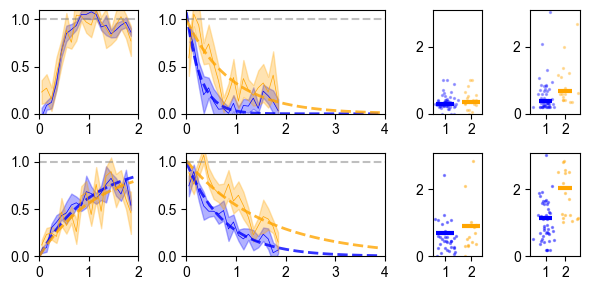

,fish_id,species,rise_tau_b,decay_tau_b,rise_tau_s,decay_tau_s
0,0,zebrafish,0.242826,0.200000,0.468693,0.676414
1,1,zebrafish,0.412943,0.200000,0.700905,1.101132
2,2,zebrafish,0.295744,0.315288,0.467200,1.204892
3,3,zebrafish,0.528035,0.306220,0.768622,0.745851
4,4,zebrafish,0.315683,0.260179,5.000000,1.104028
...,...,...,...,...,...,...
68,19,medaka,0.049921,10.000000,5.000000,5.992826
69,21,medaka,0.644944,0.594576,0.000375,1.260378
70,23,medaka,0.396695,0.350269,0.360813,1.051365
71,26,medaka,0.838656,0.755714,0.308606,2.579525


In [139]:
## make the time constant graph for big turns and small turns

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def up_exp_cureve(x, *p):
#     tau, A, t0 = p
    tau, A, t0, onset = p
    return A *(1 - np.exp(-(x - t0)/tau) + onset)
        
def down_exp_cureve(x, *p):
    tau, A, t0, onset = p
    return A * np.exp(-(x - t0)/tau + onset)

tConstant_rise_Als, tConstant_decay_Als, tConstant_rise_Mfs, tConstant_decay_Mfs  = [],[],[],[]

f, ax7s = plt.subplots(2, 4, width_ratios=[1, 2, 0.5, 0.5], figsize=(6,3))

unitBin_show_show = np.arange(0.05, 4, 0.1)
unitBin_show = np.arange(0.05, 2-0.1, 0.1)

exp_names = ["zebra_stimRest", "medaka_stimRest"]
species = ["zebrafish", "medaka"]
colors = ["blue", "orange"]
datas = [pd.read_pickle(r"%s/df_zebra_0dph_group_black_stimRest_pulse.pkl" % datafolder),
         pd.read_pickle(r"%s/df_medaka_0dph_group_black_stimRest_pulse.pkl" % datafolder)]
# exp_name = "medaka_stimRest"
# color = "orange"
# data = pd.read_pickle(r"%s/df_medaka_0dph_group_black_stimRest_pulse.pkl" % datafolder)

# tau_rises_ave, tau_decays_ave = [], []

df_stats = pd.DataFrame(columns=["fish_id", "species", "rise_tau_b", "decay_tau_b", "rise_tau_s", "decay_tau_s"])

for exp_name_i, exp_name in enumerate(exp_names):
    color = colors[exp_name_i]
    data = datas[exp_name_i]
    
    good_fishs = []

    for fish_n in range(62): #data.max(axis="fish_index")):
        fish_data = data.loc[(data['fish_index'] == fish_n)]
        if fish_data['center_distance'].mean() < 35:
            good_fishs.append(fish_n)
            
            
    selected_fish_data = data.loc[data['fish_index'].isin(good_fishs)]
    
    df3 = pd.DataFrame(columns=["fish_i", "time_bin", "big_turn_signal", "small_turn_signal",  "which", "pattern"])
    df4 = pd.DataFrame(columns=["fish_i","time_bin", "signal_up_b","signal_down_b", "signal_up_s","signal_down_s"])
    
    tau_rises_b, tau_decays_b, tau_rises_s, tau_decays_s = [], [], [], []
    
    ## screen the fish that swim in the middle of the dish
    if exp_name_i == 0:
        
        good_fishs.remove(17)
        good_fishs.remove(31)
#         good_fishs.remove(35)
        good_fishs.remove(38)
        good_fishs.remove(44)
        good_fishs.remove(46)
        good_fishs.remove(47)
        good_fishs.remove(54)
#         good_fishs.remove(55)
    else:
        good_fishs.remove(13)
        good_fishs.remove(15)
        good_fishs.remove(22)
        good_fishs.remove(27)
        good_fishs.remove(28)
        
    for fish_n, fish_i in enumerate(good_fishs):
        print("fish ", fish_i)
        selected_EACH_fish_data = selected_fish_data.loc[(selected_fish_data["fish_index"]==fish_i)]
        
        tau_rise_fish_b, tau_decay_fish_b, tau_rise_fish_s, tau_decay_fish_s = [], [], [], []

        for pattern in patterns_good:

            # stimuli
            stimuli = []
            i, j = divmod(pattern, 2)
            pulse = pulses[i]
            rest = rests[j]
        #     print(pulse, rest)

            stimBinx = np.arange(0, pulse + rest, 0.01) #0.01
            unitBinx = np.arange(0, pulse + rest, 0.1)

            # fish
            stimulus_pattern_n = pattern
            r_stim_data = selected_EACH_fish_data.loc[(selected_EACH_fish_data['stimulus_index'] == stimulus_pattern_n)]

            stimulus_pattern_n = pattern + len(patterns)
            l_stim_data = selected_EACH_fish_data.loc[(selected_EACH_fish_data['stimulus_index'] == stimulus_pattern_n)]

            df = r_stim_data.copy()
            df['bout_angle'] = r_stim_data['bout_angle'] * (-1)

            merge_data = [l_stim_data, df]
            big_data = pd.concat(merge_data)

            remainder = big_data.loc[(big_data['start_time_index'] > 7)]
            remainder7 = remainder.copy()
            remainder7['start_time_index'] = remainder['start_time_index'] - 7

            big_data["mode"] = remainder7['start_time_index'].mod(pulse + rest)

#             ave_turn_angles, show_t_units = [], []
            Mf_fs, Al_fs,Ar_fs, Af_fs, LRs, show_t_units = [], [], [], [], [],[]

            for t_bin in range(len(unitBinx) - 1):

                show_t_units.append((unitBinx[t_bin + 1] + unitBinx[t_bin]) / 2)
                data_sub = big_data.loc[(big_data["mode"] > unitBinx[t_bin]) & (
                                big_data["mode"] < unitBinx[t_bin + 1])]
                turning_angles = data_sub["bout_angle"].tolist()
#                 ave_turn_angles.append(np.nanmean(turning_angles))
                hist_val, hist_bins = np.histogram(turning_angles, bins=np.arange(-100,102,2), density=True)
                if np.isnan(hist_val).any() == True:
                    print("oops", hist_val, fish_i)
                
                sum_val = sum(hist_val)
        
                def calculate_everything(x_axis, *p0):
                    Mf, Al, Ar = p0
                    ##zebrafish
                    if exp_name_i == 0:
                        Mr, Ml = -40, 40
                        Sr, Sl = 20, 20#15, 15
                        Sf = 6

                    else:
                        Mr, Ml = -45, 45
                        Sr, Sl = 20, 20
                        Sf = 15
                    
                    Af = 1 - Ar - Al

                    left_turn = np.exp(-(x_axis-Ml)**2/(2.*Sl**2)) #norm.pdf(x_axis, Ml, Sl)
                    left_turn = left_turn/np.sum(left_turn)
                    right_turn =  np.exp(-(x_axis-Mr)**2/(2.*Sr**2)) #norm.pdf(x_axis, Mr, Sr)
                    right_turn = right_turn/np.sum(right_turn)
                    forward_swim = np.exp(-(x_axis-Mf)**2/(2.*Sf**2)) #norm.pdf(x_axis, Mf, Sf)
                    forward_swim = forward_swim/np.sum(forward_swim)
                #     print("leffffffffffft", np.sum(left_turn))
                    return (Al * left_turn + Ar * right_turn + Af * forward_swim)*sum_val/(Al + Ar + Af)

                initial_guesses = (0, 0.5, 0.1)
                

                popt, pcov = curve_fit(calculate_everything, np.arange(-100,100,2), hist_val, 
                                       p0=initial_guesses, maxfev=5000, bounds = ((-5,0.0,0.0),(25,0.6,0.3)))
                Mf_f, Al_f, Ar_f = popt
                Mf_fs.append(Mf_f)
#                 Al_fs.append(Al_f)
#                 Ar_fs.append(Ar_f)
                LRs.append(Al_f -Ar_f)

        
            def calculate_tau_rise_decay(ave_data,p0_up,p0_d,bound_min_up, bound_max_up,
                                         bound_min_up_d, bound_max_up_d):
                ## do the fitting 
                unitBin_up = np.arange(0.05, pulse+0.1, 0.1)
                unitBin_uppp = np.arange(0.05, pulse, 0.1)
                unitBin_down = np.arange(pulse+0.05, pulse+rest, 0.1)
                unitBin_down_show = np.arange(0.05, rest, 0.1)

                up_data = np.array(ave_data[0:len(unitBin_up)])
                down_data = np.array(ave_data[len(unitBin_uppp):])

                if len(unitBin_down) > len(down_data):
                    unitBin_down = unitBin_down[:-1]
                    unitBin_down_show = unitBin_down_show[:-1]

                valid_mask = ~np.isnan(up_data)
                # Apply mask to both arrays
                cleaned_up_data = up_data[valid_mask]
                cleaned_unitBin_up = unitBin_up[valid_mask]

                valid_mask2 = ~np.isnan(down_data)
                # Apply mask to both arrays
                cleaned_down_data = down_data[valid_mask2]
                cleaned_unitBin_down = unitBin_down[valid_mask2]
                cleaned_unitBin_down_show = unitBin_down_show[valid_mask2]

            
                coeff_u, var_matrix = curve_fit(up_exp_cureve, cleaned_unitBin_up, cleaned_up_data, p0=p0_up, maxfev=5000, 
                                                bounds = (bound_min_up, bound_max_up))
#                 tauu, Au, t0u = coeff_u
                tauu, Au, t0u, onsetu = coeff_u

                ## decaying

                coeff_d, var_matrix = curve_fit(down_exp_cureve, cleaned_unitBin_down, cleaned_down_data, p0=p0_d, maxfev=5000, 
                                                bounds = (bound_min_up_d, bound_max_up_d ))
#                 taud,  Ad, t0d = coeff_d
                taud,  Ad, t0d, onsetd = coeff_d
                #onsetu, onsetd, 
                return onsetu, onsetd, up_data, down_data, tauu, Au, taud,  Ad, cleaned_unitBin_up, cleaned_up_data, cleaned_unitBin_down, cleaned_down_data, cleaned_unitBin_down_show
                
            ## Big turns tau, A, t0
#             p0_up = [0.2, 0.5, 0.05, ]
#             bound_min_up, bound_max_up = (0,0,0, ),(1,1,0.1, )
#             p0_d= [1.0, 0.5, pulse, ] 
#             bound_min_up_d, bound_max_up_d = (0.2,0,pulse-0.1, ),(10,1,pulse+0.2, )
            p0_up = [0.2, 0.5, 0.05, 0.05]
            bound_min_up, bound_max_up = (0,0,0, 0),(1,1,0.1, 0.1)
            p0_d= [1.0, 0.5, pulse, 0.05] 
            bound_min_up_d, bound_max_up_d = (0.2,0,pulse-0.1, 0),(10,1,pulse+0.2, 0.1)
            
#             onsetu_b, onsetd_b, 
            onsetu_b, onsetd_b, up_data, down_data, tauu_b, Au_b, taud_b, Ad_b, cleaned_unitBin_up, cleaned_up_data_b, cleaned_unitBin_down, cleaned_down_data_b, cleaned_unitBin_down_show = calculate_tau_rise_decay(LRs,p0_up,p0_d,bound_min_up, bound_max_up,
                                         bound_min_up_d, bound_max_up_d)
        
            tau_rise_fish_b.append(tauu_b)
            tau_decay_fish_b.append(taud_b)
            
            
            ## Small turns, tau, A, t0
            p0_up = [1, 15, 0.05, 0.1]
            bound_min_up, bound_max_up = (0,0,0, 0),(5,25,0.1, 0.2)
            p0_d= [1.5, 15, pulse, 0.1] 
            bound_min_up_d, bound_max_up_d = (0.2,0,pulse-0.1, 0),(8,25,pulse+0.2, 0.2)
#             p0_up = [1.1, 15, 0.05,]
#             bound_min_up, bound_max_up = (0.1,0,0, ),(5,25,0.1, )
#             p0_d= [1.5, 15, pulse,] 
#             bound_min_up_d, bound_max_up_d = (0.2,0,pulse-0.1,),(8,25,pulse+0.2, )
            
#             onsetu_s, onsetd_s,
            onsetu_s, onsetd_s, up_data, down_data, tauu_s, Au_s, taud_s, Ad_s, cleaned_unitBin_up, cleaned_up_data_s, cleaned_unitBin_down, cleaned_down_data_s, cleaned_unitBin_down_show = calculate_tau_rise_decay(Mf_fs,p0_up,p0_d,bound_min_up, bound_max_up,
                                         bound_min_up_d, bound_max_up_d)
        
            tau_rise_fish_s.append(tauu_s)
            tau_decay_fish_s.append(taud_s)      
            
            print("Amp up big turn", Au_b, "Amp down big turn",Ad_b, "Amp up small turn", Au_s, "Amp down small turn",Ad_s, )
            for j in range(len(cleaned_unitBin_up)):
                if up_data[j] == np.nan:
                    pass
                else:
                    df = pd.DataFrame({"fish_i":fish_i,
                                       "time_bin":cleaned_unitBin_up[j], 
#                                        "ave_signal":(cleaned_up_data[j]-onsetu)/Au, 
#                                        "big_turn_signal":(cleaned_up_data_b[j] )/Au_b,
#                                        "small_turn_signal":(cleaned_up_data_s[j])/Au_s,
                                       "big_turn_signal":(cleaned_up_data_b[j]/Au_b - onsetu_b),
                                       "small_turn_signal":(cleaned_up_data_s[j]/Au_s- onsetu_s),
                                       
                                       
                                       "which":"rise",
                                      "pattern":pattern
                                      },index=[0])
                    df3 = pd.concat([df3, pd.DataFrame(df)], ignore_index=True)

            for j in range(len(cleaned_unitBin_down_show)):
                if down_data[j] == np.nan:
                    pass
                else:

        #             norm_fitd.append(down_data[j]/Ad)
                    df = pd.DataFrame({"fish_i":fish_i,
                                       "time_bin":cleaned_unitBin_down_show[j], 
#                                        "ave_signal":(cleaned_down_data[j]-onsetd)/Ad, 
#                                        "big_turn_signal":(cleaned_down_data_b[j] )/Ad_b,
#                                        "small_turn_signal":(cleaned_down_data_s[j])/Ad_s,
                                       
                                       "big_turn_signal":(cleaned_down_data_b[j]/Ad_b -onsetd_b),
                                       "small_turn_signal":(cleaned_down_data_s[j]/Ad_s- onsetd_s),
                                       
                                       "which":"decay",
                                      "pattern":pattern
                                      },index=[0])
                    df3 = pd.concat([df3, pd.DataFrame(df)], ignore_index=True)

        tau_rises_s.append(np.nanmean(tau_rise_fish_s))
        tau_decays_s.append(np.nanmean(tau_decay_fish_s))
        tau_rises_b.append(np.nanmean(tau_rise_fish_b))
        tau_decays_b.append(np.nanmean(tau_decay_fish_b))
        
        df5= pd.DataFrame({"fish_id":fish_i, "species":species[exp_name_i],
                           "rise_tau_b":np.nanmean(tau_rise_fish_b),
                           "decay_tau_b":np.nanmean(tau_decay_fish_b),
                          "rise_tau_s":np.nanmean(tau_rise_fish_s),
                           "decay_tau_s":np.nanmean(tau_decay_fish_s)},
                         index=[0])
        df_stats = pd.concat([df_stats, pd.DataFrame(df5)], ignore_index=True)

        fish_rise_b, fish_decay_b, fish_rise_s, fish_decay_s = [], [], [], []
        for j in range(len(unitBin_show)):
            sub_data_r = df3.loc[(df3["time_bin"]==unitBin_show[j]) & (df3["which"]=="rise")]
            sub_data_d = df3.loc[(df3["time_bin"]==unitBin_show[j]) & (df3["which"]=="decay")]
            fish_rise_b.append(np.nanmean(sub_data_r["big_turn_signal"]))
            fish_decay_b.append(np.nanmean(sub_data_d["big_turn_signal"]))
            fish_rise_s.append(np.nanmean(sub_data_r["small_turn_signal"]))
            fish_decay_s.append(np.nanmean(sub_data_d["small_turn_signal"]))

            df2 = pd.DataFrame({"fish_i":fish_i,
                                   "time_bin":unitBin_show[j], 
                                   "signal_up_b":np.nanmean(sub_data_r["big_turn_signal"]), 
                                   "signal_down_b":np.nanmean(sub_data_d["big_turn_signal"]),
                                "signal_up_s":np.nanmean(sub_data_r["small_turn_signal"]), 
                                   "signal_down_s":np.nanmean(sub_data_d["small_turn_signal"]),
                                  },index=[0])
            df4 = pd.concat([df4, pd.DataFrame(df2)], ignore_index=True)
        
#         ax7s[0,0].plot(unitBin_show, fish_rise_b, color=color, alpha=0.2, linewidth=0.5)#, linestyle="--", color="gray")
#         ax7s[0,1].plot(unitBin_show, fish_decay_b, color=color, alpha=0.2, linewidth=0.5)
#         ax7s[1,0].plot(unitBin_show, fish_rise_s, color=color, alpha=0.2, linewidth=0.5)#, linestyle="--", color="gray")
#         ax7s[1,1].plot(unitBin_show, fish_decay_s, color=color, alpha=0.2, linewidth=0.5)
        

    ave_ups_b, ave_downs_b, ave_ups_s, ave_downs_s = [], [], [], []
    ste_ups_b, ste_downs_b, ste_ups_s, ste_downs_s = [], [], [], []
    for j in range(len(unitBin_show)):
        sub = df4.loc[(df4["time_bin"]==unitBin_show[j])]
        ave_ups_b.append(np.nanmean(sub["signal_up_b"]))
        ave_downs_b.append(np.nanmean(sub["signal_down_b"]))
        ave_ups_s.append(np.nanmean(sub["signal_up_s"]))
        ave_downs_s.append(np.nanmean(sub["signal_down_s"]))
        
        ste_ups_b.append(np.nanstd(sub["signal_up_b"])) #/np.sqrt(len(good_fishs)))
        ste_downs_b.append(np.nanstd(sub["signal_down_b"])) #/np.sqrt(len(good_fishs)))
        ste_ups_s.append(np.nanstd(sub["signal_up_s"])) #/np.sqrt(len(good_fishs)))
        ste_downs_s.append(np.nanstd(sub["signal_down_s"])) #/np.sqrt(len(good_fishs)))
        
    ax7s[0,0].fill_between(unitBin_show, np.array(ave_ups_b) - np.array(ste_ups_b), np.array(ave_ups_b) + np.array(ste_ups_b), color=color, alpha=0.3)
    ax7s[0,1].fill_between(unitBin_show, np.array(ave_downs_b) - np.array(ste_downs_b), np.array(ave_downs_b) + np.array(ste_downs_b), color=color, alpha=0.3)
    ax7s[1,0].fill_between(unitBin_show, np.array(ave_ups_s) - np.array(ste_ups_s), np.array(ave_ups_s) + np.array(ste_ups_s), color=color, alpha=0.3)
    ax7s[1,1].fill_between(unitBin_show, np.array(ave_downs_s) - np.array(ste_downs_s), np.array(ave_downs_s) + np.array(ste_downs_s), color=color, alpha=0.3)
    ax7s[0,0].plot(unitBin_show, ave_ups_b, color=color, alpha=1, linewidth=0.5)#, linestyle="--", color="gray")
    ax7s[0,1].plot(unitBin_show, ave_downs_b, color=color, alpha=1, linewidth=0.5)
    ax7s[1,0].plot(unitBin_show, ave_ups_s, color=color, alpha=1, linewidth=0.5)#, linestyle="--", color="gray")
    ax7s[1,1].plot(unitBin_show, ave_downs_s, color=color, alpha=1, linewidth=0.5)
    
    
    p0 = [1.0, 1, 0.01, 0]
    coeff_d, var_matrix = curve_fit(up_exp_cureve, unitBin_show, ave_ups_b, p0=p0, maxfev=5000, 
#                                             bounds = ((0.2,0.999, 0.00),(10,1.001,0.02)))
                                            bounds = ((0.2,0.999, 0.00, -0.001),(2,1.001,0.02, 0.001)))
    tau, A, t0, onset = coeff_d
    def up_exp_cureve_show(x, tau, A, t0):
        tau, A, t0 = tau, A, t0
        return A *(1 - np.exp(-(x - t0)/tau))
    
    
#     out_fit = down_exp_cureve_show(unitBin_show_down_fit, [np.average(tau_decays), 0, 1, 0.1])
    unitBin_show_up_fit = np.arange(0.0, 2, 0.1)
    out_fit_b = up_exp_cureve_show(unitBin_show_up_fit, tau, A, t0)
#     ax7s[0,0].plot(unitBin_show_up_fit, out_fit_b, color=color, alpha=0.8, linestyle="--", linewidth=2)
    
    coeff_d, var_matrix = curve_fit(up_exp_cureve, unitBin_show, ave_ups_s, p0=p0, maxfev=5000, 
                                            bounds = ((0.2,0.999, 0.00, -0.001),(3,1.001,0.02, 0.001)))
    tau, A, t0, onset = coeff_d
#     print("ave",tau)
#     tau, A, t0 = coeff_d
    
    out_fit_s = up_exp_cureve_show(unitBin_show_up_fit, tau, A, t0)
    ax7s[1,0].plot(unitBin_show_up_fit, out_fit_s, color=color, alpha=0.8, linestyle="--", linewidth=2)
    
    
    
    
    p0 = [2.0, 1, 0.01, 0]
    coeff_d, var_matrix = curve_fit(down_exp_cureve, unitBin_show, ave_downs_b, p0=p0, maxfev=5000, 
                                            bounds = ((0.2,0.999, 0.00, -0.001),(10,1.001,0.02, 0.001)))
    tau, A, t0, onset = coeff_d
    def down_exp_cureve_show(x, tau, A, t0):
        tau, A, t0 = tau, A, t0
        return A * np.exp(-(x - t0)/tau) 
    
#     out_fit = down_exp_cureve_show(unitBin_show_down_fit, [np.average(tau_decays), 0, 1, 0.1])
    unitBin_show_down_fit = np.arange(0.0, 4, 0.1)
    out_fit_b = down_exp_cureve_show(unitBin_show_down_fit, tau, A, t0)
    ax7s[0,1].plot(unitBin_show_down_fit, out_fit_b, color=color, alpha=0.8, linestyle="--", linewidth=2)
    
    coeff_d, var_matrix = curve_fit(down_exp_cureve, unitBin_show, ave_downs_s, p0=p0, maxfev=5000, 
                                            bounds = ((0.2,0.999, 0.00, -0.001),(10,1.001,0.02, 0.001)))
    tau, A, t0, onset = coeff_d
    
    unitBin_show_down_fit = np.arange(0.0, 4, 0.1)
    out_fit_s = down_exp_cureve_show(unitBin_show_down_fit, tau, A, t0)
    ax7s[1,1].plot(unitBin_show_down_fit, out_fit_s, color=color, alpha=0.8, linestyle="--", linewidth=2)

    ax7s[0,0].set_ylim(0, 1.1)
    ax7s[0,1].set_ylim(0, 1.1)
    ax7s[0,0].set_xlim(0,  2)
    ax7s[0,1].set_xlim(0, 4)
    ax7s[1,0].set_ylim(0, 1.1)
    ax7s[1,1].set_ylim(0, 1.1)
    ax7s[1,0].set_xlim(0,  2)
    ax7s[1,1].set_xlim(0, 4)

    x1 = np.random.normal(exp_name_i+1, 0.2, size=len(good_fishs))
    x2 = np.random.normal(exp_name_i+1, 0.2, size=len(good_fishs))
    
    # Create scatter plots
    ax7s[0,2].scatter(x1, tau_rises_b, alpha=0.3, color=color, s=2)#, alpha=0.5)
    ax7s[0,3].scatter(x2, tau_decays_b, alpha=0.3, color=color, s=2)#, alpha=0.5)
    
    # Add mean lines
    ax7s[0,2].hlines(np.median(tau_rises_b), exp_name_i+1-0.35, exp_name_i+1+0.35, colors=color, linestyle="-", linewidth=3)
    ax7s[0,3].hlines(np.median(tau_decays_b), exp_name_i+1-0.35, exp_name_i+1+0.35,  colors=color, linestyle="-", linewidth=3)
    ax7s[0,2].set_ylim(0, 3.1)
    ax7s[0,3].set_ylim(0, 3.1)  
    print("ste tau_rises_b", np.nanstd(tau_rises_b)/len(good_fishs))
    print("ste tau_decays_b", np.nanstd(tau_decays_b)/len(good_fishs))
    
    # Create scatter plots
    ax7s[1,2].scatter(x1, tau_rises_s, alpha=0.4, color=color, s=2)#, alpha=0.5)
    ax7s[1,3].scatter(x2, tau_decays_s, alpha=0.4, color=color, s=2)#, alpha=0.5)
    print("ste tau_rises_s", np.nanstd(tau_rises_s)/len(good_fishs))
    print("ste tau_decays_s", np.nanstd(tau_decays_s)/len(good_fishs))
    
    # Add mean lines
    ax7s[1,2].hlines(np.median(tau_rises_s), exp_name_i+1-0.35, exp_name_i+1+0.35, colors=color, linestyle="-", linewidth=3)
    ax7s[1,3].hlines(np.median(tau_decays_s), exp_name_i+1-0.35, exp_name_i+1+0.35,  colors=color, linestyle="-", linewidth=3)
    ax7s[1,2].set_ylim(0, 3.1)
    ax7s[1,3].set_ylim(0, 3.1)  
    print("big turn rise: %s, decay: %s" % (np.median(tau_rises_b), np.median(tau_decays_b)))
    print("small turn rise: %s, decay: %s" % (np.median(tau_rises_s), np.median(tau_decays_s)))
    print("number of fish", len(good_fishs))
    
    
ax7s[0,0].axhline(1, color="grey", alpha=0.5, linestyle="--")
ax7s[0,1].axhline(1, color="grey", alpha=0.5, linestyle="--")
ax7s[1,0].axhline(1, color="grey", alpha=0.5, linestyle="--")
ax7s[1,1].axhline(1, color="grey", alpha=0.5, linestyle="--")
plt.tight_layout()
plt.savefig("%s/fig_tau_ave_angles_norm_all_big_small_withOnset_shade.svg" % (datafolder),
                        transparent=True)
plt.show()
 

df_stats

/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_86621/1556464597.py:75: RuntimeWarning: Mean of empty slice
  ave_turn_angles.append(np.nanmean(turning_angles))


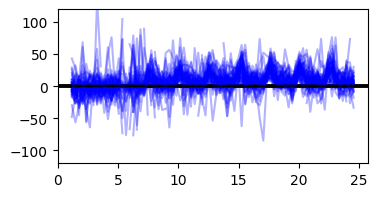

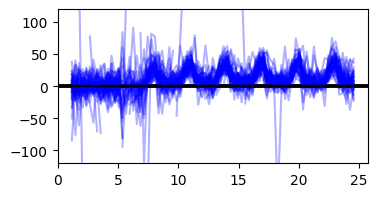

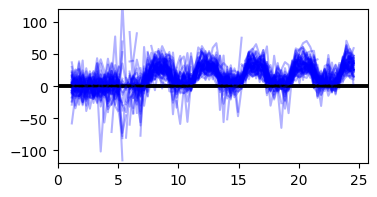

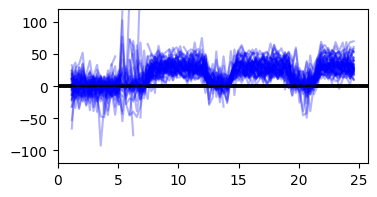

/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_86621/1556464597.py:75: RuntimeWarning: Mean of empty slice
  ave_turn_angles.append(np.nanmean(turning_angles))


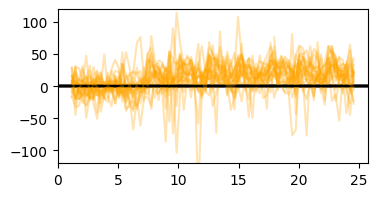

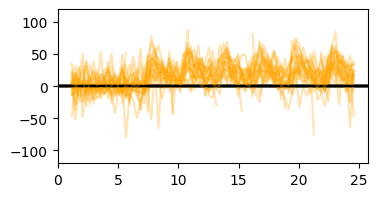

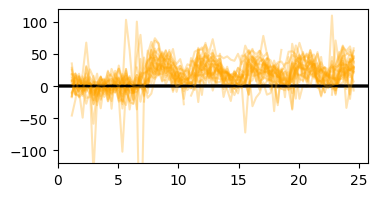

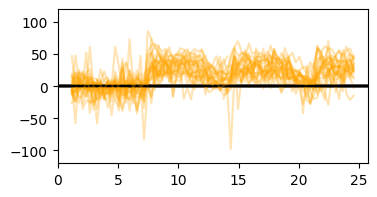

In [19]:
## Show traces of individual in response to unidirectional stimuli

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg

exp_names = ["zebra_stimRest", "medaka_stimRest"]
species = ["zebrafish", "medaka"]
colors = ["blue", "orange"]
datas = [pd.read_pickle(r"%s/df_zebra_0dph_group_black_stimRest_pulse.pkl" % datafolder),
         pd.read_pickle(r"%s/df_medaka_0dph_group_black_stimRest_pulse.pkl" % datafolder)]
patterns_good = [3, 5,7,9]
patterns = [0,1,2,3,4,5,6,7,8,9]
for exp_name_i, exp_name in enumerate(exp_names):
    color = colors[exp_name_i]
    data = datas[exp_name_i]
    
    good_fishs = []

    for fish_n in range(62): #data.max(axis="fish_index")):
        fish_data = data.loc[(data['fish_index'] == fish_n)]
        if fish_data['center_distance'].mean() < 30:
            good_fishs.append(fish_n)
            
    selected_fish_data = data.loc[data['fish_index'].isin(good_fishs)]
    
    df3 = pd.DataFrame(columns=["fish_i", "time_bin", "ave_signal", "which", "pattern"])
    df4 = pd.DataFrame(columns=["fish_i","time_bin", "signal_up","signal_down"])
    
    for pattern in patterns_good:
        
        fig1, axs1 = plt.subplots(1, 1, figsize=(4, 2))
        
        for fish_n, fish_i in enumerate(good_fishs):
#             print("fish ", fish_n)
            selected_EACH_fish_data = selected_fish_data.loc[(selected_fish_data["fish_index"]==fish_i)]
            tau_rise_fish, tau_decay_fish = [], []

        

#             # stimuli
#             stimuli = []
#             i, j = divmod(pattern, 2)
#             pulse = pulses[i]
#             rest = rests[j]
#         #     print(pulse, rest)

#             stimBinx = np.arange(0, pulse + rest, 0.01)
#             unitBinx = np.arange(0, pulse + rest, 0.1)

            # fish
            stimulus_pattern_n = pattern
            r_stim_data = selected_EACH_fish_data.loc[(selected_EACH_fish_data['stimulus_index'] == stimulus_pattern_n)]

            stimulus_pattern_n = pattern + len(patterns)
            l_stim_data = selected_EACH_fish_data.loc[(selected_EACH_fish_data['stimulus_index'] == stimulus_pattern_n)]

            df = r_stim_data.copy()
            df['bout_angle'] = r_stim_data['bout_angle'] * (-1)

            merge_data = [l_stim_data, df]
            big_data = pd.concat(merge_data)
            
            time_25 = np.arange(1, 25, 0.3)
            ave_turn_angles, show_t_units = [], []
            for t_bin in range(len(time_25) - 1):

                show_t_units.append((time_25[t_bin + 1] + time_25[t_bin]) / 2)
                data_sub = big_data.loc[(big_data["start_time_index"] > time_25[t_bin]) & (
                                big_data["start_time_index"] < time_25[t_bin + 1])]
                turning_angles = data_sub["bout_angle"].tolist()
                ave_turn_angles.append(np.nanmean(turning_angles))

            
            axs1.axhline(0, color="black")
            axs1.plot(show_t_units, ave_turn_angles , color=color,  linestyle="-", alpha=0.3) 
            
#             axs1.plot(big_data['start_time_index'], big_data['bout_angle'] , color=color, marker="o", linestyle=" ", markersize=0.5) 
            axs1.set_ylim(-120, 120)
            
        plt.show()
    

Shapiro-Wilk test for zebrafish: W=0.928, p=0.003
Shapiro-Wilk test for medaka: W=0.904, p=0.037
Levene's test: stat=9.125, p=0.003

Results of Mann-Whitney U test:
     U-val alternative    p-val       RBC      CLES
MWU  527.0   two-sided  0.51838 -0.096055  0.451973
time constant (rank-biserial correlation): -0.096

Descriptive Statistics:
       Group   n      Mean        SD       SEM
0  zebrafish  53  0.480538  0.159377  0.021892
1     medaka  22  0.551315  0.261217  0.055692


/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_19139/4064555555.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='species', y=param, data=fish_averages,
/Users/yasukoisoe/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/yasukoisoe/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/yasukoisoe/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: W

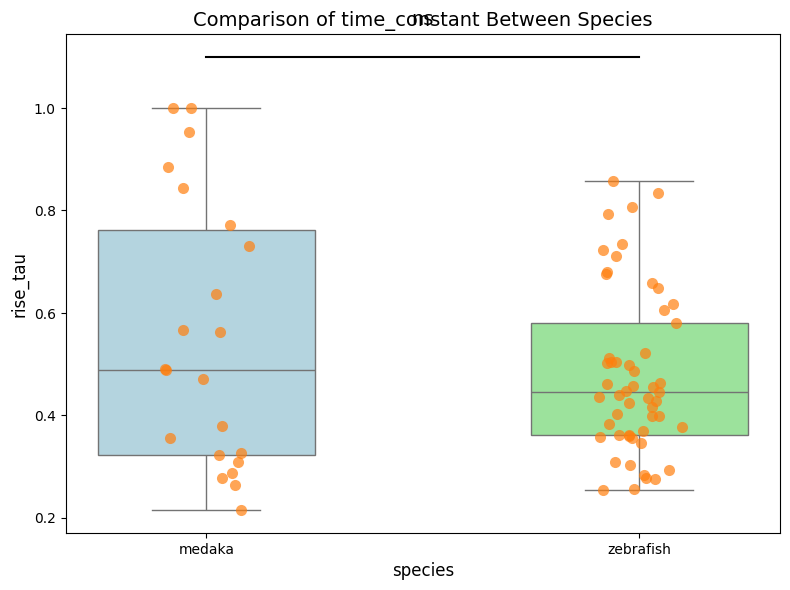

Shapiro-Wilk test for zebrafish: W=0.919, p=0.002
Shapiro-Wilk test for medaka: W=0.910, p=0.048
Levene's test: stat=37.908, p=0.000

Results of Mann-Whitney U test:
     U-val alternative         p-val       RBC      CLES
MWU   45.0   two-sided  3.980406e-10 -0.922813  0.038593
time constant (rank-biserial correlation): -0.923

Descriptive Statistics:
       Group   n      Mean        SD       SEM
0  zebrafish  53  0.413961  0.145203  0.019945
1     medaka  22  1.240307  0.644332  0.137372


/var/folders/jy/pqnptlpj3rb4yxgxwr355vlw0000gn/T/ipykernel_19139/4064555555.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='species', y=param, data=fish_averages,
/Users/yasukoisoe/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/yasukoisoe/miniconda3/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/yasukoisoe/miniconda3/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: W

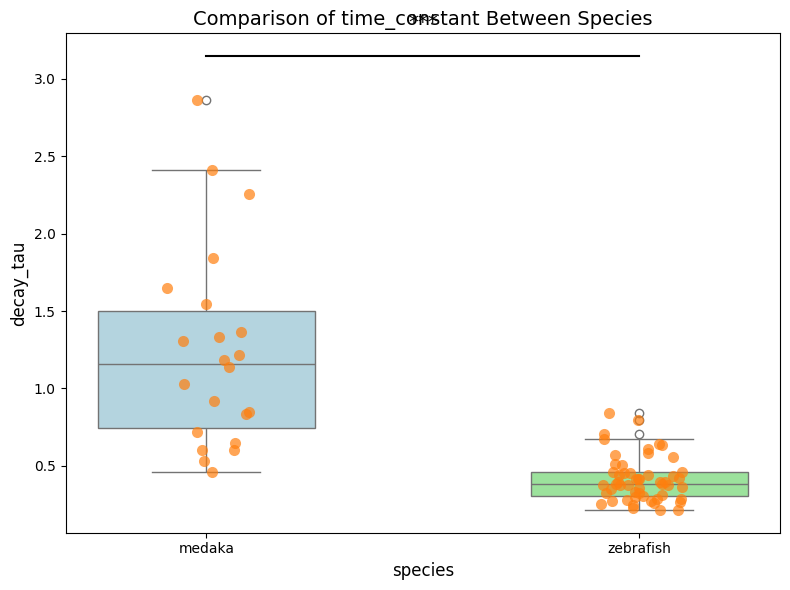

In [12]:
## run statistics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg


df = df_stats
params = ["rise_tau", "decay_tau"]
for param in params:

    # 1. Calculate average effect for each fish
    fish_averages = df.groupby(['fish_id', 'species'])[param].mean().reset_index()

    # 2. Check normality with Shapiro-Wilk test
    zebrafish_data = fish_averages[fish_averages['species'] == 'zebrafish'][param]
    medaka_data = fish_averages[fish_averages['species'] == 'medaka'][param]

    w_zebrafish, p_norm_zebrafish = stats.shapiro(zebrafish_data)
    w_medaka, p_norm_medaka = stats.shapiro(medaka_data)

    print(f"Shapiro-Wilk test for zebrafish: W={w_zebrafish:.3f}, p={p_norm_zebrafish:.3f}")
    print(f"Shapiro-Wilk test for medaka: W={w_medaka:.3f}, p={p_norm_medaka:.3f}")

    # 3. Check homogeneity of variance with Levene's test
    stat, p_var = stats.levene(zebrafish_data, medaka_data)
    print(f"Levene's test: stat={stat:.3f}, p={p_var:.3f}")

    # 4. Choose appropriate test based on assumptions
    # If both are normally distributed (p > 0.05)
    if p_norm_zebrafish > 0.05 and p_norm_medaka > 0.05:
        # Equal variances
        if p_var > 0.05:
            # Use Student's t-test
            result = pg.ttest(zebrafish_data, medaka_data, paired=False)#, equal_var=True)
            test_name = "Student's t-test"
        else:
            # Use Welch's t-test (unequal variances)
            result = pg.ttest(zebrafish_data, medaka_data, paired=False)#, equal_var=False)
            test_name = "Welch's t-test"

        # Effect size (Cohen's d)
        effect_size = result['cohen-d'].values[0]
        effect_size_name = "Cohen's d"
    else:
        # Use non-parametric Mann-Whitney U test
        result = pg.mwu(zebrafish_data, medaka_data)
        test_name = "Mann-Whitney U test"
        effect_size = result['RBC'].values[0]
        effect_size_name = "rank-biserial correlation"

    # 5. Print results
    print(f"\nResults of {test_name}:")
    print(result)
    print(f"time constant ({effect_size_name}): {effect_size:.3f}")

    # 6. Calculate descriptive statistics
    desc_stats = pd.DataFrame({
        'Group': ['zebrafish', 'medaka'],
        'n': [len(zebrafish_data), len(medaka_data)],
        'Mean': [zebrafish_data.mean(), medaka_data.mean()],
        'SD': [zebrafish_data.std(), medaka_data.std()],
        'SEM': [zebrafish_data.sem(), medaka_data.sem()]
    })
    print("\nDescriptive Statistics:")
    print(desc_stats)

    # 7. Create a visualization
    plt.figure(figsize=(8, 6))

    # Box plot with individual data points
    ax = sns.boxplot(x='species', y=param, data=fish_averages, 
                    width=0.5, palette=['lightblue', 'lightgreen'])
    sns.stripplot(x='species', y=param, data=fish_averages, 
                 size=8, jitter=True, alpha=0.7)

    # Add p-value
    p_val = result['p-val'].values[0]
    sig_text = ''
    if p_val < 0.001:
        sig_text = '***'
    elif p_val < 0.01:
        sig_text = '**'
    elif p_val < 0.05:
        sig_text = '*'
    else:
        sig_text = 'ns'

    # Add significance bar
    y_max = fish_averages[param].max() * 1.1
    plt.plot([0, 1], [y_max, y_max], 'k-', linewidth=1.5)
    plt.text(0.5, y_max*1.05, sig_text, ha='center', va='bottom', fontsize=14)

    # Add labels
    plt.xlabel('species', fontsize=12)
    plt.ylabel("%s" % param, fontsize=12)
    plt.title('Comparison of time_constant Between Species', fontsize=14)
    plt.xticks([0, 1], ['medaka', 'zebrafish'], fontsize=10)
    plt.tight_layout()

    # Save the figure
    # plt.savefig('species_comparison.png', dpi=300)
    plt.show()